# PCA and Clustering model building  

## Problem statement 

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid.

### Bussiness Goal 

Our job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Based on which we need to suggest the countries which the CEO needs to focus on the most.

# Step 1: Reading and Understanding the Data

In [1]:
#Import all libraries and dependences for dataframe 

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore")

# import all libraries and dependencies for machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

# import all libraries and dependencies for clustering
from sklearn.cluster import KMeans

# import all libraries and dependencies for data visualization
pd.options.display.float_format='{:.4f}'.format
plt.rcParams['figure.figsize'] = [8,8]
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1) 
sns.set(style='darkgrid')
import matplotlib.ticker as plticker
%matplotlib inline

In [2]:
#Reading the column names and the deatils 
df_columns =pd.read_csv('Countrydata_columndetails.csv')
df_columns.head(10)

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 1000 live births
2,exports,Exports of goods and services. Given as %age of the Total GDP
3,health,Total health spending as %age of Total GDP
4,imports,Imports of goods and services. Given as %age of the Total GDP
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of the Total GDP
7,life_expec,The average number of years a new born child would live if the current mortality patterns are to remain the same
8,total_fer,The number of children that would be born to each woman if the current age-fertility rates remain the same.
9,gdpp,The GDP per capita. Calculated as the Total GDP divided by the total population.


In [3]:
df_country = pd.read_csv('Country_data.csv')
df_country

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2000,10.0000,7.5800,44.9000,1610,9.4400,56.2000,5.8200,553
1,Albania,16.6000,28.0000,6.5500,48.6000,9930,4.4900,76.3000,1.6500,4090
2,Algeria,27.3000,38.4000,4.1700,31.4000,12900,16.1000,76.5000,2.8900,4460
3,Angola,119.0000,62.3000,2.8500,42.9000,5900,22.4000,60.1000,6.1600,3530
4,Antigua and Barbuda,10.3000,45.5000,6.0300,58.9000,19100,1.4400,76.8000,2.1300,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2000,46.6000,5.2500,52.7000,2950,2.6200,63.0000,3.5000,2970
163,Venezuela,17.1000,28.5000,4.9100,17.6000,16500,45.9000,75.4000,2.4700,13500
164,Vietnam,23.3000,72.0000,6.8400,80.2000,4490,12.1000,73.1000,1.9500,1310
165,Yemen,56.3000,30.0000,5.1800,34.4000,4480,23.6000,67.5000,4.6700,1310


In [4]:
df_country.shape

(167, 10)

In [5]:
df_country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000
mean,38.2701,41.1090,6.8157,46.8902,17144.6886,7.7818,70.5557,2.9480,12964.1557
std,40.3289,27.4120,2.7468,24.2096,19278.0677,10.5707,8.8932,1.5138,18328.7048
min,2.6000,0.1090,1.8100,0.0659,609.0000,-4.2100,32.1000,1.1500,231.0000
25%,8.2500,23.8000,4.9200,30.2000,3355.0000,1.8100,65.3000,1.7950,1330.0000
50%,19.3000,35.0000,6.3200,43.3000,9960.0000,5.3900,73.1000,2.4100,4660.0000
75%,62.1000,51.3500,8.6000,58.7500,22800.0000,10.7500,76.8000,3.8800,14050.0000
max,208.0000,200.0000,17.9000,174.0000,125000.0000,104.0000,82.8000,7.4900,105000.0000


In [6]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


#Step :2 Data celaning 

    ##We need to do some basic cleansing check in order to feed our model the correct data.

In [7]:
pd.isnull(df_country).sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

Inference:
None of the columns have null values hence no imputation or drop required.

In [8]:
df_country.dtypes

country       object 
child_mort    float64
exports       float64
health        float64
imports       float64
income        int64  
inflation     float64
life_expec    float64
total_fer     float64
gdpp          int64  
dtype: object

Inference:
None of the columns have inconsistent datatype, hence no conversion is required.

In [9]:
# Duplicates check
df_country.loc[df_country.duplicated()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


# Step 3:Data Visualization 

(9.5, -0.5)

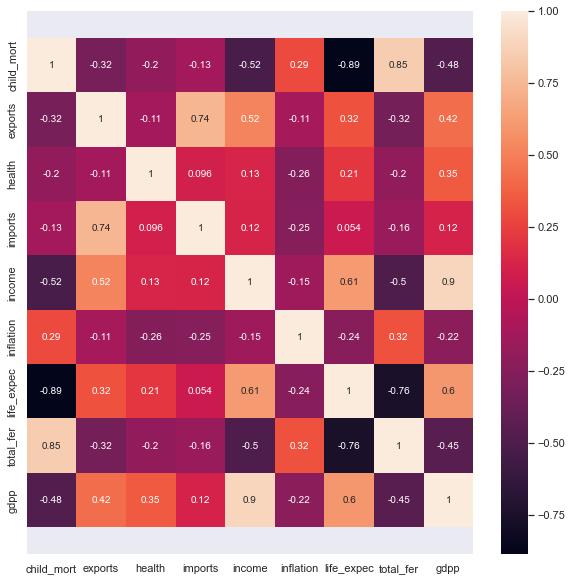

In [10]:
# Heatmap to understand the attributes dependency

plt.figure(figsize = (10,10))        
ax = sns.heatmap(df_country.corr(),annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

Inference:

child_mortality and life_expentency are highly correlated with correlation of -0.89

child_mortality and total_fertility are highly correlated with correlation of 0.85

imports and exports are highly correlated with correlation of 0.74

life_expentency and total_fertility are highly correlated with correlation of -0.76

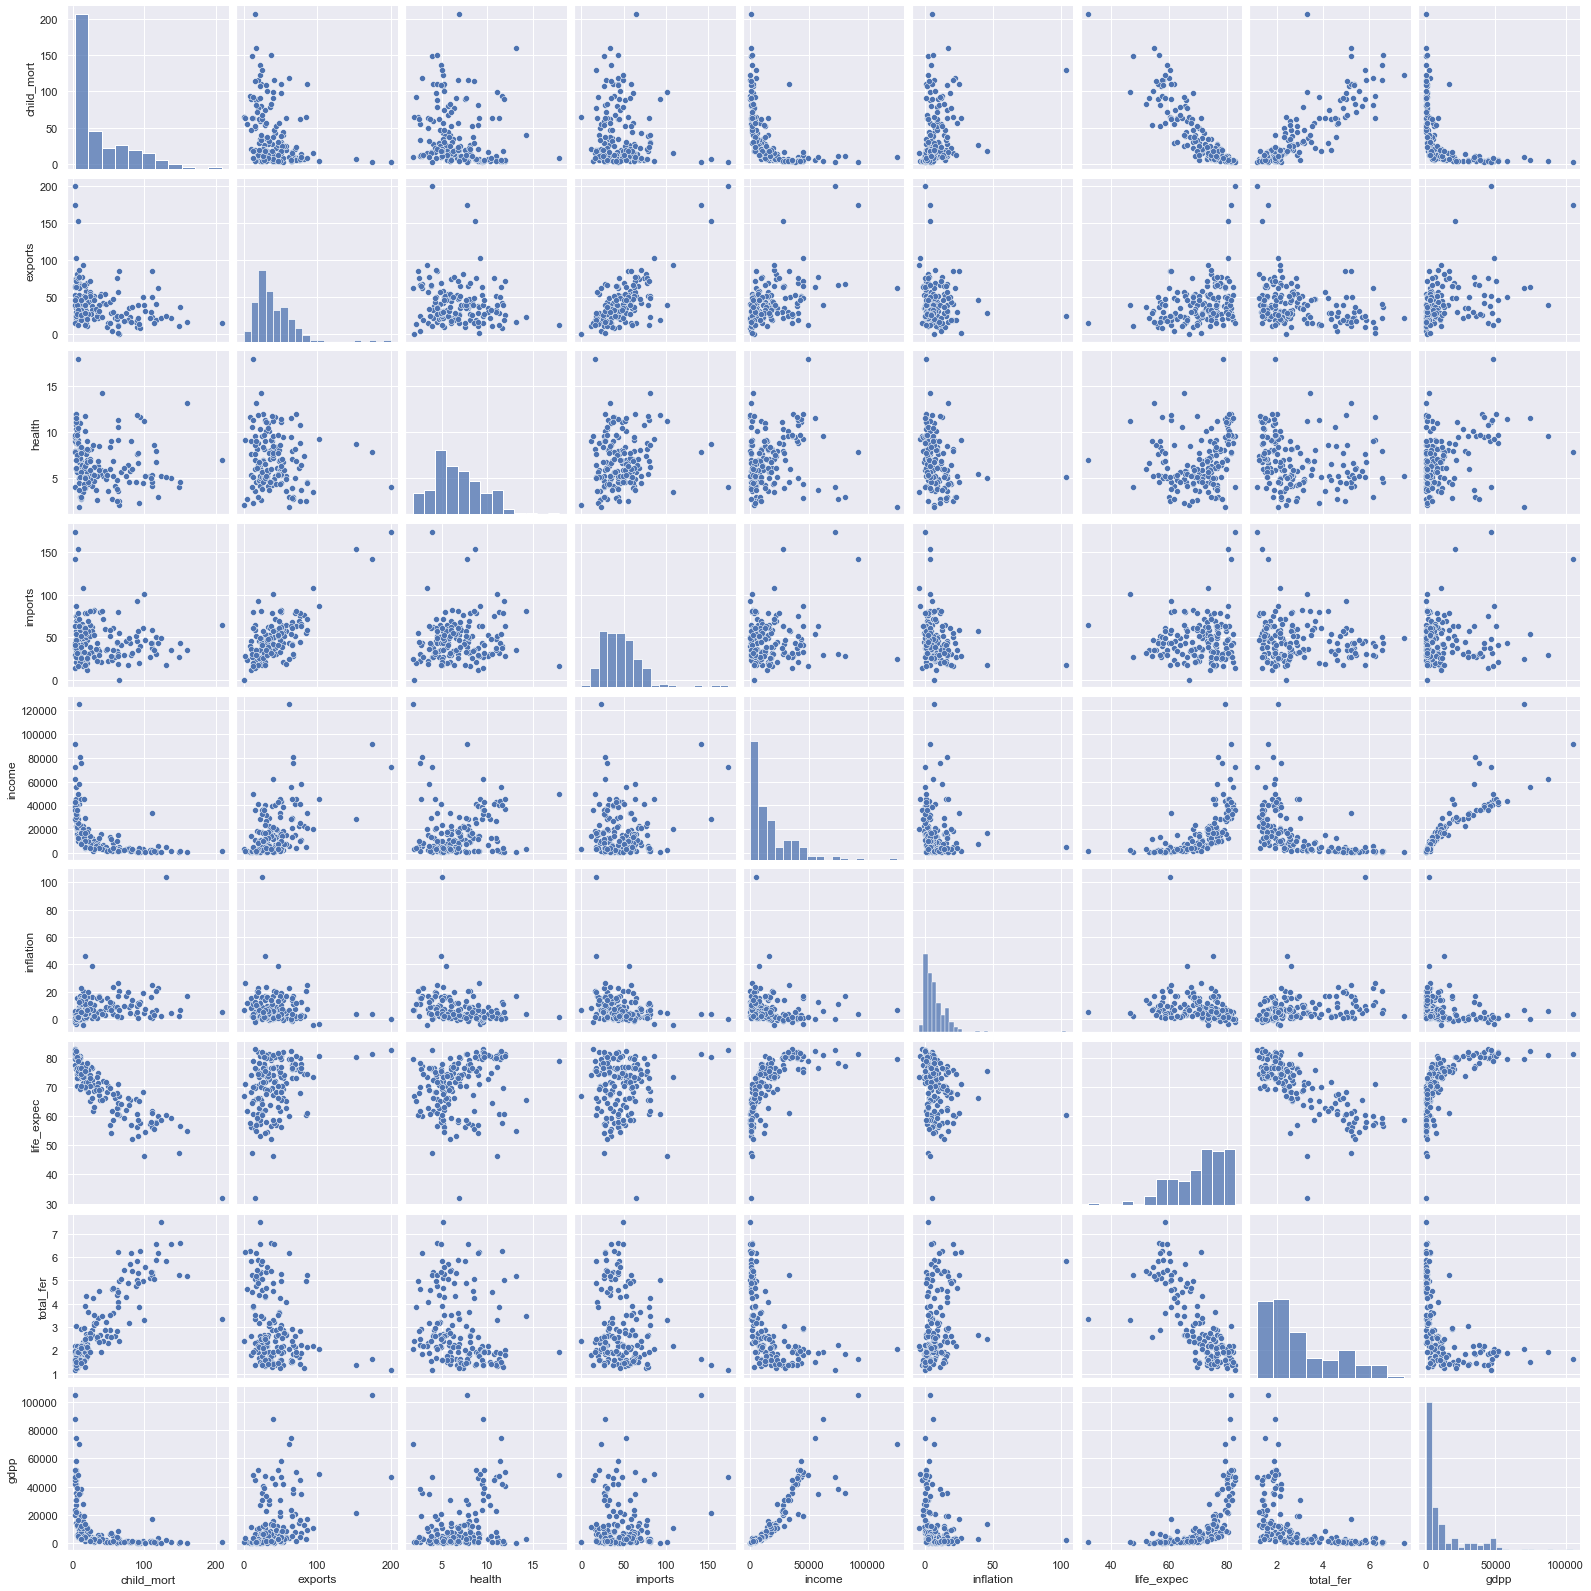

In [11]:
sns.pairplot(df_country)

# Derived Metrices

Deducing imports,exports and health spending from percentage values to actual values of their GDP per capita .Because the percentage values don't give a clear picture of that country. For example Austria and Belarus have almost same exports % but their gdpp has a huge gap which doesn't give an accurate idea of which country is more developed than the other

In [12]:
#Converting exports,imports and health spending percentages to absolute values.

df_country['exports'] = df_country['exports']*df_country['gdpp']/100
df_country['imports'] = df_country['imports']*df_country['gdpp']/100
df_country['health'] = df_country['health']*df_country['gdpp']/100

In [13]:
df_country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2000,55.3000,41.9174,248.2970,1610,9.4400,56.2000,5.8200,553
1,Albania,16.6000,1145.2000,267.8950,1987.7400,9930,4.4900,76.3000,1.6500,4090
2,Algeria,27.3000,1712.6400,185.9820,1400.4400,12900,16.1000,76.5000,2.8900,4460
3,Angola,119.0000,2199.1900,100.6050,1514.3700,5900,22.4000,60.1000,6.1600,3530
4,Antigua and Barbuda,10.3000,5551.0000,735.6600,7185.8000,19100,1.4400,76.8000,2.1300,12200


In [14]:
#Dropping Country field as final dataframe will only contain data columns

df_country1 = df_country.drop(['country'],axis=1)
df_country1

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2000,55.3000,41.9174,248.2970,1610,9.4400,56.2000,5.8200,553
1,16.6000,1145.2000,267.8950,1987.7400,9930,4.4900,76.3000,1.6500,4090
2,27.3000,1712.6400,185.9820,1400.4400,12900,16.1000,76.5000,2.8900,4460
3,119.0000,2199.1900,100.6050,1514.3700,5900,22.4000,60.1000,6.1600,3530
4,10.3000,5551.0000,735.6600,7185.8000,19100,1.4400,76.8000,2.1300,12200
...,...,...,...,...,...,...,...,...,...
162,29.2000,1384.0200,155.9250,1565.1900,2950,2.6200,63.0000,3.5000,2970
163,17.1000,3847.5000,662.8500,2376.0000,16500,45.9000,75.4000,2.4700,13500
164,23.3000,943.2000,89.6040,1050.6200,4490,12.1000,73.1000,1.9500,1310
165,56.3000,393.0000,67.8580,450.6400,4480,23.6000,67.5000,4.6700,1310


#Rescaling the features ---------
important to do standardisation/normalisation. There are two common ways of rescaling:

Normalisation(Min-Max scaling)
Standardisation (mean-0, sigma-1)

Here, we will use Standardisation Scaling.

In [15]:
#standarisation technique for scaling 
scaler = StandardScaler()
df_country1_scaled =scaler.fit_transform(df_country1) 

df_country1_scaled

array([[ 1.29153238, -0.4110113 , -0.56503989, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.35019096, -0.43921769, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.31852577, -0.48482608, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541, -0.36146329, -0.53848844, ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.39216643, -0.55059641, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.38395214, -0.54049845, ..., -2.09278484,
         1.6246091 , -0.62954556]])

# Step 5 : PCA Application

We are doing PCA because we want to remove the redundancies in the data and find the most important directions where the data was aligned

Principal component analysis (PCA) is one of the most commonly used dimensionality reduction techniques in the industry. By converting large data sets into smaller ones containing fewer variables, it helps in improving model performance, visualising complex data sets, and in many more areas.

Let's use PCA for dimensionality reduction as from the heatmap it is evident that correlation exists between the attributes.

In [16]:
pca =PCA()
pca_values = pca.fit_transform(df_country1_scaled)

In [17]:
pca_values

array([[-2.63557499e+00,  1.47226739e+00, -5.49488868e-01, ...,
        -4.02106673e-01,  1.52246778e-02,  2.14526223e-02],
       [-2.42055643e-02, -1.42989187e+00, -1.41232909e-02, ...,
         2.62749660e-01,  3.75846547e-04, -3.38831728e-02],
       [-4.59557398e-01, -6.75495376e-01,  9.59354680e-01, ...,
         2.26680500e-01,  4.17041908e-02, -3.26636757e-02],
       ...,
       [-5.94449148e-01, -1.07633467e+00,  5.28874919e-01, ...,
         1.27676529e-01, -3.75433341e-02, -7.38600849e-02],
       [-1.80237235e+00,  5.88729402e-01,  1.18085099e+00, ...,
        -1.30849147e-01,  1.19704727e-02, -6.63306309e-03],
       [-2.64450479e+00,  1.57195347e+00, -1.74684997e-01, ...,
        -7.51162884e-01,  5.94382085e-03,  3.54065192e-02]])

In [18]:
# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_
var

array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

Text(0, 0.5, 'Variance Ratio')

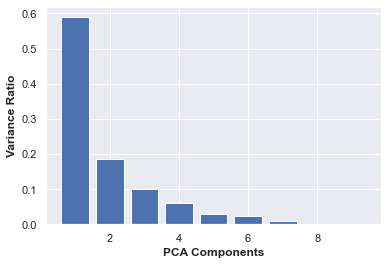

In [19]:
# Variance Ratio bar plot for each PCA components.

ax = plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.xlabel("PCA Components",fontweight = 'bold')
plt.ylabel("Variance Ratio",fontweight = 'bold')

Inference:

With first component variance explained is almost 60%.

For second component variance explained is almost 20%.

In [20]:
# Cumulative variance 
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 58.94,  77.39,  87.3 ,  93.37,  96.4 ,  98.86,  99.8 ,  99.96,
       100.01])

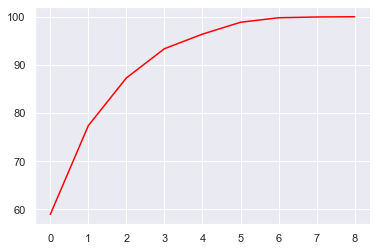

In [21]:
# Variance plot for PCA components obtained 
plt.plot(var1,color="red")

Inference:

It is evident from the above Scree plot that more than 90% variance is explained by the first 3 principal components. Hence, we will use these components only going forward for Clustering process.

In [22]:
pca.components_

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

In [31]:
df = list((df_country1).columns )
attributes_pca = pd.DataFrame({'Attribute':df,'PC_1':pca.components_[0],'PC_2':pca.components_[1],'PC_3':pca.components_[2],'PC_4':pca.components_[3]})

In [32]:
attributes_pca 

,Attribute,PC_1,PC_2,PC_3,PC_4
0,child_mort,-0.3164,0.4763,-0.1500,-0.1481
1,exports,0.3429,0.3973,-0.0306,0.4494
2,health,0.3585,0.1551,-0.0757,-0.5997
3,imports,0.3449,0.3708,-0.0722,0.4618
4,income,0.3800,0.1284,0.1458,-0.1548
5,inflation,-0.1431,0.2213,0.9484,-0.0076
6,life_expec,0.3439,-0.3698,0.1968,-0.0184
7,total_fer,-0.3028,0.4597,-0.0778,-0.2139
8,gdpp,0.4000,0.2006,0.0103,-0.3648


Inference:
    
life expectency, income, gdpp and health are very well explained by PC1.

imports and exports are well explained by both the components PC1,PC2 and PC4.

child mortality and total fertility are well explained by PC2.

inflation is neither explained by PC1 nor with PC2

inflation is better explained by PC3

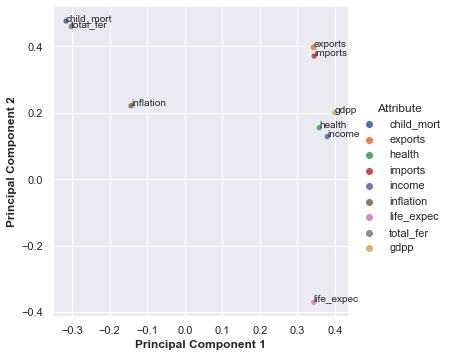

In [33]:
# Plotting the above dataframe for better visualization with PC1 and PC2

sns.pairplot(data=attributes_pca, x_vars=["PC_1"], y_vars=["PC_2"], hue = "Attribute" ,height=5)
plt.xlabel("Principal Component 1",fontweight = 'bold')
plt.ylabel("Principal Component 2",fontweight = 'bold')

for i,txt in enumerate(attributes_pca.Attribute):
    plt.annotate(txt, (attributes_pca.PC_1[i],attributes_pca.PC_2[i]))

In [68]:
from sklearn.decomposition import IncrementalPCA
inc_pca = IncrementalPCA(n_components=3)

In [69]:
df_inc_pca = inc_pca.fit_transform(df_country1_scaled)
df_inc_pca

array([[-2.63744157e+00,  1.46903797e+00, -5.41359106e-01],
       [-2.22769569e-02, -1.43189586e+00, -2.07009539e-02],
       [-4.57626261e-01, -6.73300938e-01,  9.61867281e-01],
       [-2.72452030e+00,  2.17458267e+00,  6.06686548e-01],
       [ 6.49848516e-01, -1.02437392e+00, -2.50102847e-01],
       [ 3.71968554e-02, -6.80889086e-01,  1.46696276e+00],
       [-3.32691520e-01, -1.27451685e+00,  1.76636110e-01],
       [ 3.18036154e+00, -2.50784878e-01, -1.16877257e-01],
       [ 3.81568156e+00,  2.56083499e-01, -2.70495294e-01],
       [-4.67515152e-01, -4.93492360e-01,  6.03288028e-01],
       [ 1.49875246e+00, -4.28907400e-01, -5.50237572e-01],
       [ 1.47097104e+00, -3.26795693e-01,  4.28411771e-01],
       [-1.01419903e+00, -7.11807758e-01, -1.16988551e-01],
       [ 8.45238116e-01, -1.00860625e+00, -4.17261615e-01],
       [-1.34473920e-02, -9.82186148e-01,  8.80913018e-01],
       [ 3.96087770e+00,  8.38740841e-01, -2.94077196e-01],
       [-4.02707071e-01, -9.21816189e-01

In [72]:
# Creating new dataframe with Principal components

df_pca = pd.DataFrame(df_inc_pca, columns=["PC_1", "PC_2","PC_3"])
df_pca_final = pd.concat([df_country['country'], df_pca], axis=1)
df_pca_final.head()

,country,PC_1,PC_2,PC_3
0,Afghanistan,-2.6374,1.4690,-0.5414
1,Albania,-0.0223,-1.4319,-0.0207
2,Algeria,-0.4576,-0.6733,0.9619
3,Angola,-2.7245,2.1746,0.6067
4,Antigua and Barbuda,0.6498,-1.0244,-0.2501


# Step6- Model Building 

K- means Clustering
K-means clustering is one of the simplest and popular unsupervised machine learning algorithms.

The algorithm works as follows:

First we initialize k points, called means, randomly. We categorize each item to its closest mean and we update the mean’s coordinates, which are the averages of the items categorized in that mean so far. We repeat the process for a given number of iterations and at the end, we have our clusters.

Finding the Optimal Number of Clusters

# Elbow Curve to get the right number of Clusters

A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. The Elbow Method is one of the most popular methods to determine this optimal value of k.

In [74]:
df_pca_final_data = df_pca_final.drop(['country'],axis=1)

In [88]:
kmeans = KMeans(n_clusters=5,random_state=0)
kmeans.fit(df_pca_final_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [89]:
kmeans.inertia_

277.64452953012994

In [90]:
wcss = []
for i in range(1, 8):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(df_pca_final_data)
    wcss.append(kmeans.inertia_)

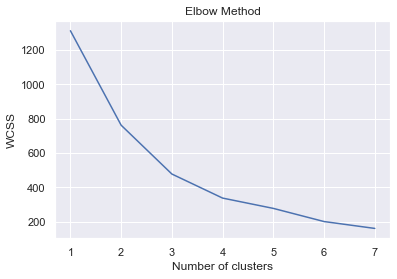

In [91]:
wcss = []
for i in range(1, 8):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(df_pca_final_data)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 8), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [98]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(3, random_state=42)
clusters_new.fit(df_inc_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [99]:
clusters_new.labels_

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 0,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 0, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 2, 1, 0, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2])

In [100]:
#Assign clusters to the data set
df_country['clusterid_new'] = clusters_new.labels_

In [101]:
clusters_new.cluster_centers_

array([[ 0.01765655, -0.84550245,  0.11425748],
       [ 3.99125054,  0.69582459, -0.0159534 ],
       [-2.27892015,  1.22914504, -0.21001971]])

In [102]:
df_country.groupby('clusterid_new').agg(['mean'])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
,mean,mean,mean,mean,mean,mean,mean,mean,mean
clusterid_new,,,,,,,,,
0,20.1772,3650.0663,573.1653,3759.5459,14169.4565,6.9954,73.5522,2.2257,8226.8696
1,5.0926,31897.8593,4378.9552,26469.6000,50833.3333,3.1204,80.4630,1.7752,48759.2593
2,91.6104,879.0635,114.8218,827.0288,3897.3542,11.9111,59.2396,4.9921,1909.2083


# Inferance: 
    From the above table we could make out the the countries group under cluster 2 and cluster 0 underprivileged and need some aid.
   These countries have high mortality rate and less life expectance and less health and gdpp.
    Hence, these countries need some help.

In [103]:
df_country[df_country['clusterid_new']==0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusterid_new
1,Albania,16.6000,1145.2000,267.8950,1987.7400,9930,4.4900,76.3000,1.6500,4090,0
2,Algeria,27.3000,1712.6400,185.9820,1400.4400,12900,16.1000,76.5000,2.8900,4460,0
4,Antigua and Barbuda,10.3000,5551.0000,735.6600,7185.8000,19100,1.4400,76.8000,2.1300,12200,0
5,Argentina,14.5000,1946.7000,834.3000,1648.0000,18700,20.9000,75.8000,2.3700,10300,0
6,Armenia,18.1000,669.7600,141.6800,1458.6600,6700,7.7700,73.3000,1.6900,3220,0
...,...,...,...,...,...,...,...,...,...,...,...
160,Uruguay,10.6000,3129.7000,993.6500,3022.6000,17100,4.9100,76.4000,2.0800,11900,0
161,Uzbekistan,36.3000,437.4600,80.1780,393.3000,4240,16.5000,68.8000,2.3400,1380,0
162,Vanuatu,29.2000,1384.0200,155.9250,1565.1900,2950,2.6200,63.0000,3.5000,2970,0
163,Venezuela,17.1000,3847.5000,662.8500,2376.0000,16500,45.9000,75.4000,2.4700,13500,0


In [104]:
df_country[df_country['clusterid_new']==1]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusterid_new
7,Australia,4.8000,10276.2000,4530.8700,10847.1000,41400,1.1600,82.0000,1.9300,51900,1
8,Austria,4.3000,24059.7000,5159.0000,22418.2000,43200,0.8730,80.5000,1.4400,46900,1
15,Belgium,4.5000,33921.6000,4750.8000,33166.8000,41100,1.8800,80.0000,1.8600,44400,1
23,Brunei,10.5000,23792.2000,1002.5200,9884.0000,80600,16.7000,77.1000,1.8400,35300,1
29,Canada,5.6000,13793.4000,5356.2000,14694.0000,40700,2.8700,81.3000,1.6300,47400,1
42,Cyprus,3.6000,15461.6000,1838.7600,17710.0000,33900,2.0100,79.9000,1.4200,30800,1
44,Denmark,4.1000,29290.0000,6612.0000,25288.0000,44000,3.2200,79.5000,1.8700,58000,1
53,Finland,3.0000,17879.4000,4134.9000,17278.8000,39800,0.3510,80.0000,1.8700,46200,1
54,France,4.2000,10880.8000,4831.4000,11408.6000,36900,1.0500,81.4000,2.0300,40600,1
58,Germany,4.2000,17681.4000,4848.8000,15507.8000,40400,0.7580,80.1000,1.3900,41800,1


In [105]:
df_country[df_country['clusterid_new']==2]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusterid_new
0,Afghanistan,90.2000,55.3000,41.9174,248.2970,1610,9.4400,56.2000,5.8200,553,2
3,Angola,119.0000,2199.1900,100.6050,1514.3700,5900,22.4000,60.1000,6.1600,3530,2
17,Benin,111.0000,180.4040,31.0780,281.9760,1820,0.8850,61.8000,5.3600,758,2
21,Botswana,52.5000,2768.6000,527.0500,3257.5500,13300,8.9200,57.1000,2.8800,6350,2
25,Burkina Faso,116.0000,110.4000,38.7550,170.2000,1430,6.8100,57.9000,5.8700,575,2
26,Burundi,93.6000,20.6052,26.7960,90.5520,764,12.3000,57.7000,6.2600,231,2
28,Cameroon,108.0000,290.8200,67.2030,353.7000,2660,1.9100,57.3000,5.1100,1310,2
31,Central African Republic,149.0000,52.6280,17.7508,118.1900,888,2.0100,47.5000,5.2100,446,2
32,Chad,150.0000,330.0960,40.6341,390.1950,1930,6.3900,56.5000,6.5900,897,2
36,Comoros,88.2000,126.8850,34.6819,397.5730,1410,3.8700,65.9000,4.7500,769,2


In [124]:
# Below is the final list of the countries which are in dire need of help 
df=df_country[df_country['clusterid_new']==2]
final_list =df['country']
# Final countries list
final_list.reset_index(drop=True)

0     Afghanistan             
1     Angola                  
2     Benin                   
3     Botswana                
4     Burkina Faso            
5     Burundi                 
6     Cameroon                
7     Central African Republic
8     Chad                    
9     Comoros                 
10    Congo, Dem. Rep.        
11    Congo, Rep.             
12    Cote d'Ivoire           
13    Equatorial Guinea       
14    Eritrea                 
15    Gabon                   
16    Gambia                  
17    Ghana                   
18    Guinea                  
19    Guinea-Bissau           
20    Haiti                   
21    Iraq                    
22    Kenya                   
23    Kiribati                
24    Lao                     
25    Lesotho                 
26    Liberia                 
27    Madagascar              
28    Malawi                  
29    Mali                    
30    Mauritania              
31    Mozambique              
32    Na